## Hyun-Joon Yang
## yanghyun@usc.edu
## BISC 481
## HW1

In [1]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

### 1. General Knowledge

#### A. List the four most common molecular interactions discussed in lecture ordered by strength (from strongest to weakest, assuming typical atomic distances)

1. Covalent
2. Ionic
3. Hydrogen
4. Van der Waals

#### B. Briefly describe the main chemical characteristics that distinguish (a) arginine, lysine, and histidine from the other amino acids and (b) arginine, lysine, and histidine from each other

1. Arginine, lysine, and histidine are all amino acids that have (can have) a positive charge.
2. Histidine is neutral but can be protonated to become positively charged.

#### C. Specify the importance of hydrogen bonds in stabilizing (a) α-helices, (b) 310-helices, (c) π-helices, (d) β-strands, and (e) β-sheets.

1. Alpha helices are formed through hydrogen bonds between an Oxygen atom and an NH group that is 4 residue positions ahead of it. <br>
2. 310-helices are formed through hydrogen bonds between an Oxygen atom and an NH group that is 3 residue positions ahead of it. These helices are less stable than alpha helices. <br>
3. Pi-helices are formed through hydrogen bonds between an Oxygen atom and an NH group that is 5 residue positions ahead of it. These helices are less stable than alpha helices. <br>
4. Without hydrogen bonds, beta strands by themselves are unstable. <br>
5. With hydrogen bonds between other beta strands, more stable beta sheets can be formed with the strands being parallel or antiparallel. <br>

### 2. Hydrogen Bonding and Dipole Interactions
The hydrogen bond is a complex atomic interaction, but we can understand
some of its properties by approximating it as a simple dipole-dipole interaction.
<br><br>
A dipole, in this context, is just two point-charges of opposite signs that are
separated by some fixed distance 𝑑. A dipole interaction is the interaction of two
pairs of point charges, where each pair forms a dipole.

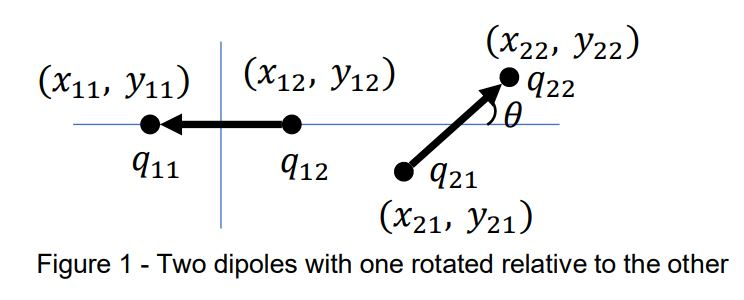

In [2]:
Image('img1.jpg')

The table below gives the coordinates of two dipoles, where one is in a fixed orientation (𝐷1) and the other is rotated about its center (𝐷2). 

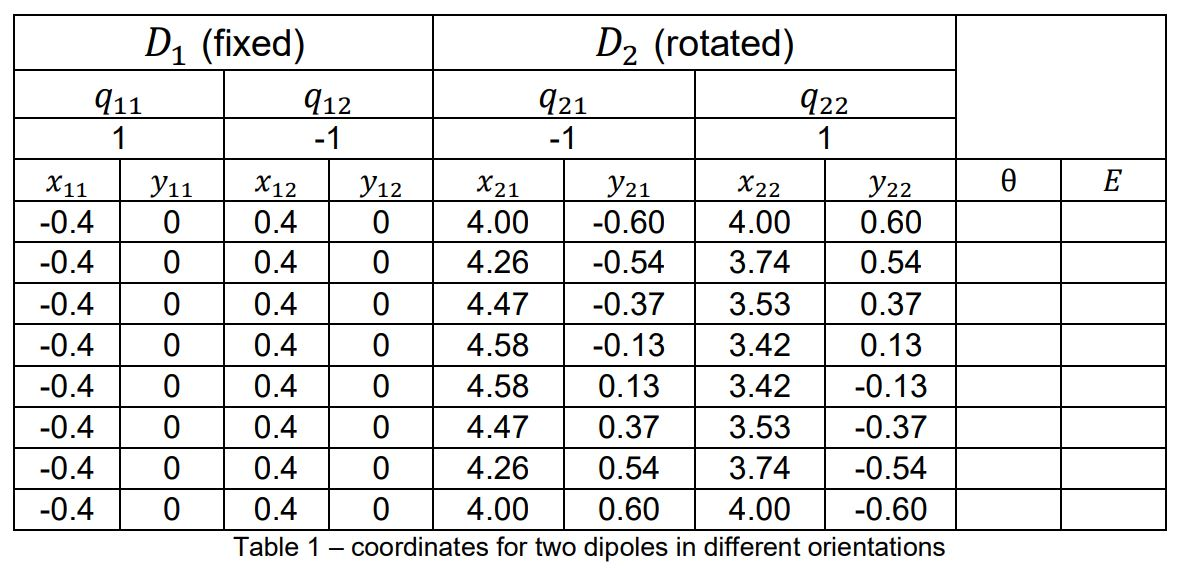

In [3]:
Image('img2.jpg')

#### A. Using the data in table 1, compute the interaction energy between the two dipoles and the angle of the second dipole relative to the first (note the correct orientation). Then plot the values of 𝐸 v.s. θ for the various orientations of 𝐷2 . Note: to compute these energies, use the Coulomb interaction with 𝑘 = 5 (in arbitrary units). To compute the angle you may wish to use the dot product formula.

Coulomb Energy: $$U_E = k\frac{q_1q_2}{r}$$
Total Energy: $$U_{Etot} = \frac{1}{2}\sum_{i=1}\sum_{j=1}{U_{ij}}$$
Dot Product Formula: $$ \cos{\theta} = \frac{a \cdot b}{|a||b|} $$

In [4]:
def calcR(M1, M2):
    """
    :param M1, M2: m x 2 matrix
    :return: 1 x m vector of distance
    """
    return np.sqrt(np.sum(np.square(M2-M1), axis=1))

def calcE(k, q1, q2, r):
    """
    :param k: scalar for k
    :param q1: scalar for q1
    :param q2: scalar for q2
    :param r: 1 x m vector of distance
    """
    return k*q1*q2/r

def calcTotE(D1, D2, Q1, Q2):
    """
    :param D1: m x 2*numMol1 matrix of coordinates
    :param D2: m x 2*numMol2 matrix of coordinates
    :param Q1: 1 x numMol1 vector of charges
    :param Q2: 1 x numMol2 vector of charges
    :return: m x 1 vector of energy
    """
    e_tot = np.zeros(D1.shape[0])
    for i in range(D1.shape[1]//2):
        for j in range(D2.shape[1]//2):
            R = calcR(D1[:,2*i:2*i+2], D2[:,2*j:2*j+2])
            q1 = Q1[i]
            q2 = Q2[j]
            e = calcE(5, q1, q2, R)
            e_tot += e
    return e_tot


def calcTheta(D1, D2, Q1, Q2):
    """
    :param D1: m x 4 matrix of coordinates (for dipole)
    :param D2: m x 4 matrix of coordinates (for dipole)
    :param Q1: 1 x 2 vector of charges
    :param Q2: 1 x 2 vector of charges
    :return: vector of size m for angle theta
    """
    theta = np.zeros(D1.shape[0])
    a = D1[:,0:2] - D1[:,2:4]
    b = D2[:,0:2] - D2[:,2:4]
    if Q1[0] < Q1[1]:
        a *= -1
    if Q2[0] < Q2[1]:
        b *= -1
#     a_mag = np.sqrt(np.sum(np.square(a), axis=1))
#     b_mag = np.sqrt(np.sum(np.square(b), axis=1))
#     theta_rad = np.arccos(np.sum(a * b, axis=1) / (a_mag * b_mag))
    theta1 = np.arccos(a[:,0] / np.sqrt(np.sum(np.square(a), axis=1)))
    theta2 = np.arccos(b[:,0] / np.sqrt(np.sum(np.square(b), axis=1)))
    th1 = np.where(a[:,1] >= 0, theta1, 2*np.pi - theta1)
    th2 = np.where(b[:,1] >= 0, theta2, 2*np.pi - theta2)
    theta_rad = th1 - th2
    theta_deg = theta_rad * 180 / np.pi
    return theta_deg

In [5]:
D1 = np.array([[-0.4, 0, 0.4, 0]] * 8, dtype='float64')

x1 = [4.00, 4.26, 4.47, 4.58]
for i in range(len(x1)):
    x1.append(x1[-1-2*i])
x2 = [4.00, 3.74, 3.53, 3.42]
for i in range(len(x2)):
    x2.append(x2[-1-2*i])
y1 = [-0.60, -0.54, -0.37, -0.13]
for i in range(len(y1)):
    y1.append(y1[-1-2*i]*-1)
m1 = np.array([[x1[i], y1[i]] for i in range(len(x1))])
m2 = np.array([[x2[i], y1[i]*-1] for i in range(len(x2))])
D2 = np.concatenate((m1, m2), axis=1)

Q1 = np.array([1, -1])
Q2 = np.array([-1, 1])

# print(D1)
# print(D2)
# print(Q1)
# print(Q2)

In [6]:
print('E:', calcTotE(D1, D2, Q1, Q2))
print('Theta:', calcTheta(D1, D2, Q1, Q2))

E: [ 0.         -0.06321582 -0.12002283 -0.15403407 -0.15403407 -0.12002283
 -0.06321582  0.        ]
Theta: [ 90.          64.29004622  38.21102543  12.63336194 -12.63336194
 -38.21102543 -64.29004622 -90.        ]


#### B. How does the dipole-dipole interaction depend on the orientation of the two dipoles? When is the potential energy a minimum?

The energy of the interaction decreases when the dipoles approach being at same orientation and increases when they approach being opposite orientation. The potential energy is minimum when the orientations of the two dipoles are the same.

#### C.  How might this observation (as it relates to hydrogen bonding) be important for determining the structure of biological molecules?

Molecules will try to adopt a structure so that the H-bonds are all the same orientation to minimize the energy.

#### D. Choose an arbitrary orientation of 𝐷2 and then translate the dipole along the x-axis for various increasing separations of the two dipoles. Compute the interaction energy as a function of this separation. Plot the logarithm of the interaction energy versus the logarithm of the separation and include it in your report. What is the slope of this plot?

In [7]:
def findMid(M1):
    """
    :param M1: m x 4 matrix with coordinates of 2 points
    :return: m x 2 with coordinates of midpoint
    """
    result = np.zeros((M1.shape[0], 2))
    minVal_x = np.minimum(M1[:,0], M1[:,2])
    minVal_y = np.minimum(M1[:,1], M1[:,3])
    diff_x = np.absolute(M1[:,0] - M1[:,2]) / 2
    diff_y = np.absolute(M1[:,1] - M1[:,3]) / 2
    x = minVal_x + diff_x
    y = minVal_y + diff_y
    result[:,0] = x
    result[:,1] = y
    return result

In [8]:
D1 = np.array([[-0.4, 0, 0.4, 0]] * 8, dtype='float64')

D2 = np.array([], dtype='float64')
R = np.array([], dtype='float64')

v = np.array([4.26, -0.54, 3.74, 0.54])
for i in range(8):
    D2 = np.concatenate((D2, v + i*np.array([4, 0, 4, 0])), axis=0)
D2 = D2.reshape(8, 4)

C1 = findMid(D1)
C2 = findMid(D2)

R = calcR(C1, C2)
    
Q1 = np.array([1, -1])
Q2 = np.array([-1, 1])

# print(D1, D2)
# print(C1, C2)
# print(Q1, Q2)
# print(R)

Text(0.5, 0, 'log(distance)')

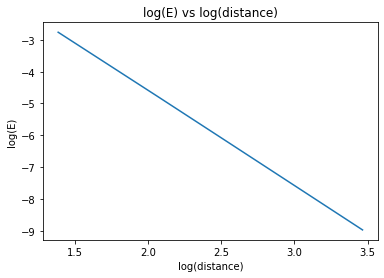

In [9]:
# print(calcTotE(D1, D2, Q1, Q2))

X = np.log(R)
Y = np.log(-calcTotE(D1, D2, Q1, Q2))

# print(X, Y)

plt.figure()
plt.plot(X, Y)
plt.title('log(E) vs log(distance)')
plt.ylabel('log(E)')
plt.xlabel('log(distance)')

In [10]:
slope = (Y[1] - Y[0]) / (X[1] - X[0])
print('Slope:', slope)

Slope: -2.96944831658136


### 3. Ionic Interactions
For a pair of ions, we can ignore any effects of covalent bonding or hydrogen bonding and just consider the Lennard-Jones and Coulomb interactions.
<br>
<br>
Let 𝑞1 and 𝑞2 be the charges on the respective ions (with opposite signs) and let 𝑟 be the distance between their centers.

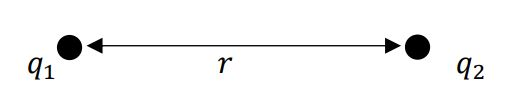

In [11]:
Image('img3.jpg')

#### A. Write down the total interaction energy between the two ions, including the Lennard-Jones and the Coulomb interaction. You can use a common form of the Lennard-Jones potential, $𝑉(𝑟) = 𝐴 \left[ \left(\frac{𝑏}{𝑟}\right)^{12} – 2\left(\frac{𝑏}{𝑟}\right)^{6} \right]$. Use SI units for the Coulomb potential.

$$ V_{total} = V_{LJ} + V_{Coulomb} = 𝐴 \left[ \left(\frac{𝑏}{𝑟}\right)^{12} – 2\left(\frac{𝑏}{𝑟}\right)^{6} \right] + \frac{1}{4\pi\epsilon_0}\frac{q_1q_2}{r} $$

#### B. Using whatever software you would like, generate a plot of the Coulomb potential, the Lennard-Jones potential and the total potential energy (all on the same axis) as a function of distance 𝑟. Make sure each line is a different color, and include a legend labeling each line. Plot the value of 𝑟 between 1.2 and 3. Use the following parameter values: $𝑞_1 = 2$, $𝑞_2 = −2$, $𝜀 = 2$, $𝐴 = 0.05$, $𝑏 = 1.5$ (note: these are not meant to be realistic values). Be sure to include axis labels on your graph.

Text(0, 0.5, 'V_total')

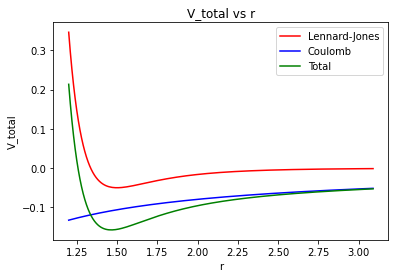

In [12]:
def calcVTotal(A, b, q1, q2, epsilon, r):
    V_lj = A * (np.power(b/r, 12) - 2*(np.power(b/r, 6)))
    V_c = (1/(4 * np.pi * epsilon)) * (q1 * q2 / r)
    return V_lj, V_c, V_lj + V_c

x = [i/100 for i in range(120, 310)]
V_lj, V_c, V_tot = calcVTotal(0.05, 1.5, 2, -2, 2, np.array(x))
plt.figure()
plt.plot(x, V_lj, 'r', label='Lennard-Jones')
plt.plot(x, V_c, 'b', label='Coulomb')
plt.plot(x, V_tot, 'g', label='Total')
plt.legend()
plt.title('V_total vs r')
plt.xlabel('r')
plt.ylabel('V_total')

#### C. Using your plot, estimate the ideal distance of the ionic interaction pair (i.e. the value of 𝑟 where the total potential energy is a minimum).

1.45

#### D.  Make a similar plot as in part B, but this time plot the magnitude of the forces. What is the magnitude of the total force on each ion at the ideal distance you found in part C?

$$ F(r) = -\frac{dU}{dr} $$
<br>
$$ F_{LJ} = \frac{12A}{r}\left[\left(\frac{b}{r}\right)^{12}-\left(\frac{b}{r}\right)^6\right] $$
<br>
$$ F_{Coulomb} = \frac{1}{4\pi\epsilon_0}\frac{q_1q_2}{r^2} $$
<br>
$$ F_{total} = F_{LJ} + F_{Coulomb} = \frac{12A}{r}\left[\left(\frac{b}{r}\right)^{12}-\left(\frac{b}{r}\right)^6\right] + \frac{1}{4\pi\epsilon_0}\frac{q_1q_2}{r^2} $$

Text(0, 0.5, 'F_total')

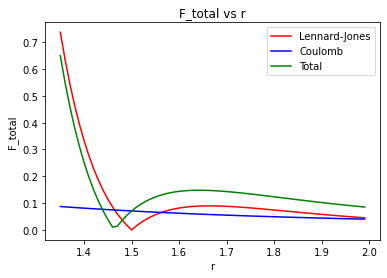

In [13]:
def calcFTotal(A, b, q1, q2, epsilon, r):
    F_lj = (12 * A / r) * (np.power(b/r, 12) - np.power(b/r, 6))
    F_c = (1/(4 * np.pi * epsilon)) * (q1 * q2 / np.power(r, 2))
    return F_lj, F_c, F_lj + F_c

x = [i/100 for i in range(135, 200)]
F_lj, F_c, F_tot = calcFTotal(0.05, 1.5, 2, -2, 2, np.array(x))
plt.figure()
plt.plot(x, np.absolute(F_lj), 'r', label='Lennard-Jones')
plt.plot(x, np.absolute(F_c), 'b', label='Coulomb')
plt.plot(x, np.absolute(F_tot), 'g', label='Total')
plt.legend()
plt.title('F_total vs r')
plt.xlabel('r')
plt.ylabel('F_total')

The magnitude of total force at the ideal distance is 0.

### 4. Analysis of Protein Secondary Structure
In this question we’ll get familiar with a few tools that are useful in structural biology. Before you can answer the questions below, we need to install the tool PyMOL.
<br><br>
PyMOL is a program for visualizing molecular structures (among many other things) and is built with the python programming language (hence the "Py" in PyMOL). It is available through the Anaconda python package management system. Anaconda is just a way of easily installing and managing python packages (a package is synonymous with a "module", or "library") as well as installing python itself. You can follow these two steps to get PyMOL running on your system.
<br><br>
#### 1. Install Anaconda (skip if you already have this installed) <br>
Go to the following link and download a miniconda installer for your operating system. Please download the python 3.8 version
https://docs.conda.io/en/latest/miniconda.html Then follow the installation instructions for your particular operating system.
<br><br>
Windows: https://conda.io/projects/conda/en/latest/userguide/install/windows.html
<br>
macOS: https://conda.io/projects/conda/en/latest/user-guide/install/macos.html
<br>
Linux: https://conda.io/projects/conda/en/latest/user-guide/install/linux.html
<br><br>
#### 2. Install PyMOL
In a shell/command prompt, use the following command to install PyMOL: <br>
`conda install -c schrodinger pymol`

#### A. Download the three-dimensional protein structures with the PDB IDs (a) 1A6M and (b) 1LJM from the Protein Data Bank at https://www.rcsb.org. Using PyMOL, visualize the secondary structure for both proteins and briefly describe the main differences between them (protein secondary structure can be visualized using the “cartoon” representation in PyMol). Include the visualizations in your report

1A6M protein structure is mostly made up of alpha helices whereas 1LJM structure is mostly made up of beta sheets.

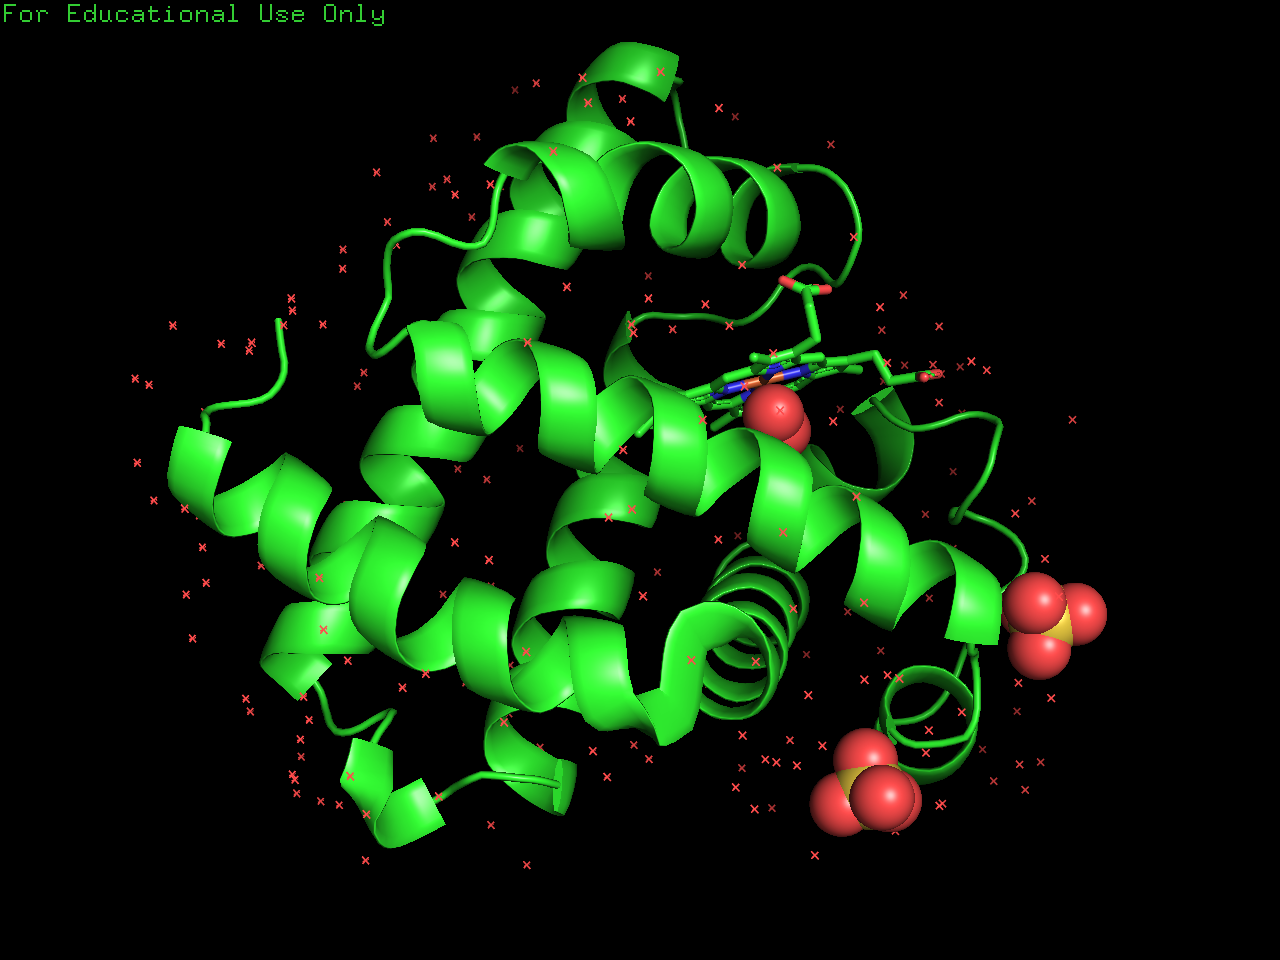

In [14]:
Image('1A6M.png')

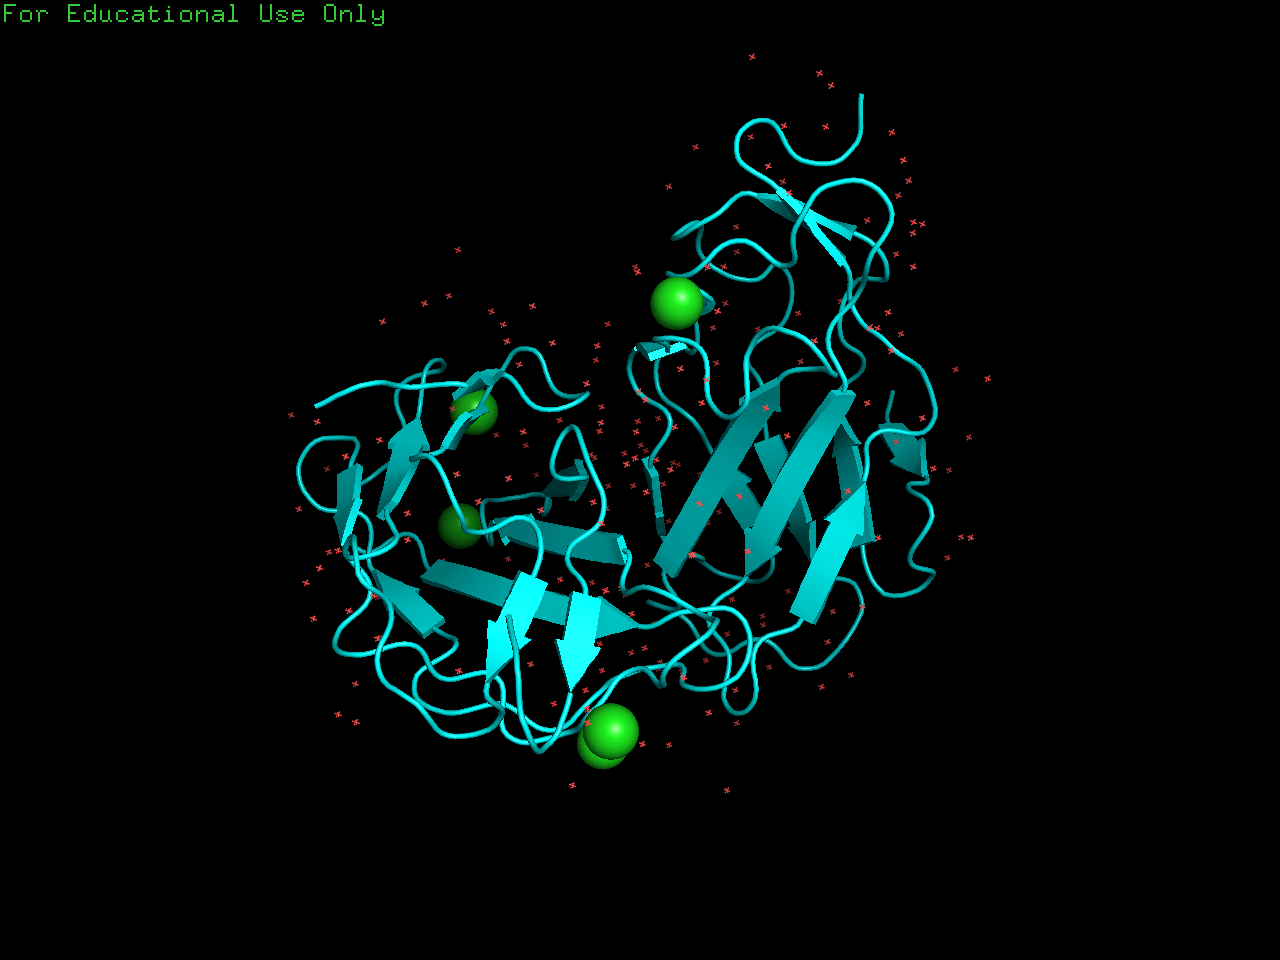

In [15]:
Image('1LJM.png')

#### B. For each of the two structures (a) 1A6M and (b) 1LJM, use PyMOL to calculate the dihedral angles ϕ and ψ . This can be done using the command

`phi_psi all`

#### which will output a long list of pairs of dihedral angles such as:

```
ARG-1064: ( -88.0, 158.4 )
THR-1065: ( -103.1, -166.7 )
ASP-1066: ( -83.2, 3.7 )
SER-1067: ( -117.8, 123.5 )
PRO-1068: ( -66.8, -17.9 )
...
```

#### Take this data and plot a Ramachandra plot for the two proteins. Do the plots match what you would expect based on part A?

In [16]:
def extractPhiPsi(filename):
    with open(filename, 'r') as f:
        result = []
        for line in f:
            line = line.strip()
            values = line[-len('(  -76.0,  145.3 )')+1:-1]
            phi, psi = values.strip().split(',')
            phi = float(phi.strip())
            psi = float(psi.strip())
            result.append([phi, psi])
    return np.array(result)

protein1 = extractPhiPsi('1A6M.txt')
protein2 = extractPhiPsi('1LJM.txt')

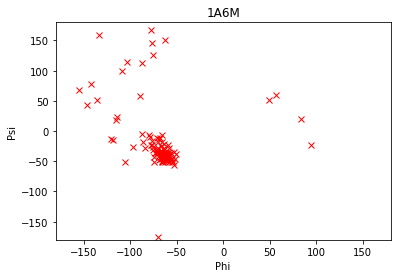

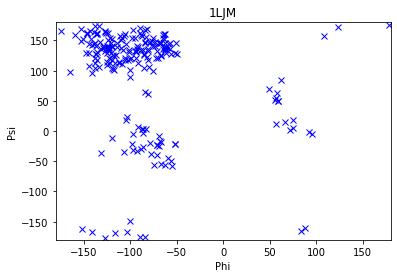

In [17]:
p1 = plt.figure()
axes = p1.add_subplot()
axes.set_xlim(-180, 180)
axes.set_ylim(-180, 180)
axes.plot(protein1[:,0], protein1[:,1], 'rx')
plt.title('1A6M')
plt.xlabel('Phi')
plt.ylabel('Psi')
plt.show()

p2 = plt.figure()
axes = p2.add_subplot()
axes.set_xlim(-180, 180)
axes.set_ylim(-180, 180)
plt.plot(protein2[:,0], protein2[:,1], 'bx')
plt.title('1LJM')
plt.xlabel('Phi')
plt.ylabel('Psi')
plt.show()

The plots seem to match the cartoons from part A with 1A6M having most dihedral angles in the right-handed alpha helix region and 1LJM having most dihedral angles in the beta strand region.